# 📊 Play Store Exploratory Data Analysis (EDA)
## Comprehensive Analysis of Cleaned Google Play Store Dataset

This notebook performs detailed EDA on the cleaned Play Store dataset to uncover insights about app trends, ratings, categories, and more.

### Table of Contents
1. [Setup & Data Loading](#1-setup--data-loading)
2. [Dataset Overview](#2-dataset-overview)
3. [Univariate Analysis](#3-univariate-analysis)
4. [Bivariate Analysis](#4-bivariate-analysis)
5. [Category Analysis](#5-category-analysis)
6. [Correlation Analysis](#6-correlation-analysis)
7. [Time-Based Analysis](#7-time-based-analysis)
8. [Key Insights & Conclusions](#8-key-insights--conclusions)

## 1. Setup & Data Loading

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configuration
warnings.filterwarnings('ignore')
%matplotlib inline

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [2]:
# Load the cleaned dataset
df = pd.read_csv('playstore_cleaned.csv')

# Convert Last_Updated to datetime
df['Last_Updated'] = pd.to_datetime(df['Last_Updated'])

print(f"✅ Dataset loaded successfully!")
print(f"📊 Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")

✅ Dataset loaded successfully!
📊 Shape: 10,357 rows × 12 columns


## 2. Dataset Overview

In [3]:
# Preview the data
df.head(10)

,App,Category,Rating,Reviews,Size_MB,Installs,Type,Price_USD,Content_Rating,Genres,Last_Updated,Min_Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,4.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,4.4
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000,Free,0.0,Everyone,Art & Design,2017-03-26,2.3
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19.0,50000,Free,0.0,Everyone,Art & Design,2018-04-26,4.0
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29.0,1000000,Free,0.0,Everyone,Art & Design,2018-06-14,4.2
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33.0,1000000,Free,0.0,Everyone,Art & Design,2017-09-20,3.0
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1,10000,Free,0.0,Everyone,Art & Design;Creativity,2018-07-03,4.0


In [4]:
# Data types and info
print("📋 Data Types:")
print("="*50)
for col in df.columns:
    print(f"{col:20} → {df[col].dtype}")

📋 Data Types:
App                  → object
Category             → object
Rating               → float64
Reviews              → int64
Size_MB              → float64
Installs             → int64
Type                 → object
Price_USD            → float64
Content_Rating       → object
Genres               → object
Last_Updated         → datetime64[ns]
Min_Android_Ver      → float64


In [5]:
# Missing values check
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_pct.round(2)
})

print("❓ Missing Values Summary:")
print("="*50)
print(missing_df)

❓ Missing Values Summary:
                 Missing Count  Missing %
App                          0        0.0
Category                     0        0.0
Rating                       0        0.0
Reviews                      0        0.0
Size_MB                      0        0.0
Installs                     0        0.0
Type                         0        0.0
Price_USD                    0        0.0
Content_Rating               0        0.0
Genres                       0        0.0
Last_Updated                 0        0.0
Min_Android_Ver              0        0.0


In [6]:
# Numerical summary statistics
print("📈 Numerical Features Summary:")
df.describe().round(2)

📈 Numerical Features Summary:


,Rating,Reviews,Size_MB,Installs,Price_USD,Last_Updated,Min_Android_Ver
count,10357.00,10357.00,10357.00,1.035700e+04,10357.00,10357,10357.00
mean,4.20,405904.61,20.07,1.415776e+07,1.03,2017-11-14 09:25:19.320266496,3.87
min,1.00,0.00,0.01,0.000000e+00,0.00,2010-05-21 00:00:00,1.00
25%,4.10,32.00,5.70,1.000000e+03,0.00,2017-09-03 00:00:00,4.00
50%,4.30,1680.00,13.00,1.000000e+05,0.00,2018-05-20 00:00:00,4.00
75%,4.50,46416.00,26.00,1.000000e+06,0.00,2018-07-19 00:00:00,4.10
max,5.00,78158306.00,100.00,1.000000e+09,400.00,2018-08-08 00:00:00,8.00
std,0.49,2696777.84,21.02,8.023955e+07,16.28,NaN,0.79


In [7]:
# Categorical features summary
print("📝 Categorical Features Summary:")
print("="*50)
categorical_cols = ['Category', 'Type', 'Content_Rating', 'Genres']

for col in categorical_cols:
    print(f"\n{col}:")
    print(f"  • Unique values: {df[col].nunique()}")
    print(f"  • Most common: {df[col].mode()[0]}")

📝 Categorical Features Summary:

Category:
  • Unique values: 33
  • Most common: FAMILY

Type:
  • Unique values: 2
  • Most common: Free

Content_Rating:
  • Unique values: 6
  • Most common: Everyone

Genres:
  • Unique values: 119
  • Most common: Tools


## 3. Univariate Analysis

Analyzing individual features to understand their distributions.

### 3.1 Rating Distribution

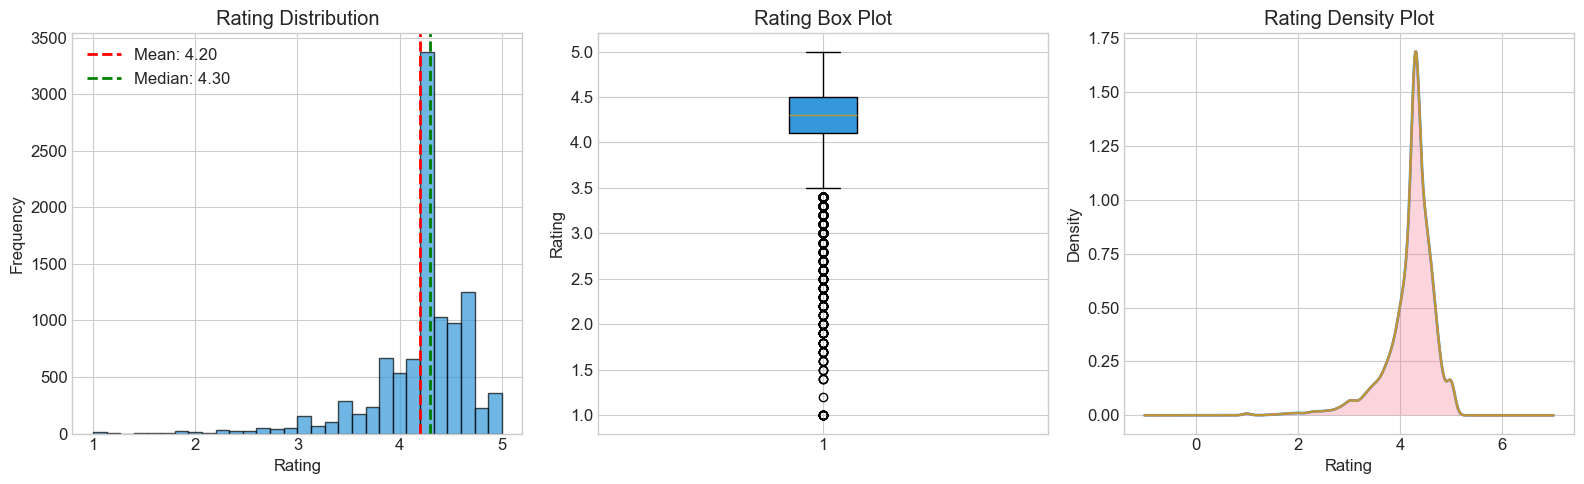


📊 Rating Statistics:
   • Mean: 4.20
   • Median: 4.30
   • Std Dev: 0.49
   • Min: 1.0, Max: 5.0
   • Skewness: -2.05


In [8]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Histogram
axes[0].hist(df['Rating'], bins=30, edgecolor='black', alpha=0.7, color='#3498db')
axes[0].axvline(df['Rating'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["Rating"].mean():.2f}')
axes[0].axvline(df['Rating'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["Rating"].median():.2f}')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Rating Distribution')
axes[0].legend()

# Box plot
bp = axes[1].boxplot(df['Rating'], patch_artist=True)
bp['boxes'][0].set_facecolor('#3498db')
axes[1].set_ylabel('Rating')
axes[1].set_title('Rating Box Plot')

# KDE plot
df['Rating'].plot(kind='kde', ax=axes[2], color='#3498db', linewidth=2)
axes[2].fill_between(df['Rating'].plot(kind='kde', ax=axes[2]).get_lines()[0].get_xdata(),
                     df['Rating'].plot(kind='kde', ax=axes[2]).get_lines()[0].get_ydata(), alpha=0.3)
axes[2].set_xlabel('Rating')
axes[2].set_ylabel('Density')
axes[2].set_title('Rating Density Plot')

plt.tight_layout()
plt.show()

print(f"\n📊 Rating Statistics:")
print(f"   • Mean: {df['Rating'].mean():.2f}")
print(f"   • Median: {df['Rating'].median():.2f}")
print(f"   • Std Dev: {df['Rating'].std():.2f}")
print(f"   • Min: {df['Rating'].min():.1f}, Max: {df['Rating'].max():.1f}")
print(f"   • Skewness: {df['Rating'].skew():.2f}")

### 3.2 Reviews Distribution

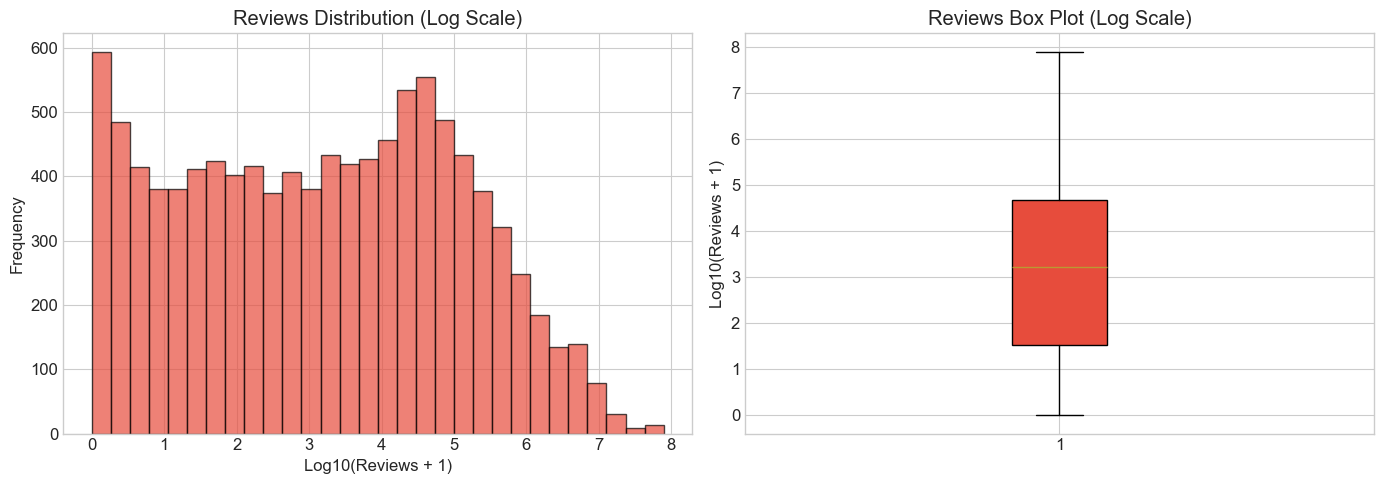


📊 Reviews Statistics:
   • Mean: 405,905
   • Median: 1,680
   • Max: 78,158,306
   • Apps with 0 reviews: 593


In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Log scale histogram (due to high skewness)
axes[0].hist(np.log10(df['Reviews'] + 1), bins=30, edgecolor='black', alpha=0.7, color='#e74c3c')
axes[0].set_xlabel('Log10(Reviews + 1)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Reviews Distribution (Log Scale)')

# Box plot (log scale)
bp = axes[1].boxplot(np.log10(df['Reviews'] + 1), patch_artist=True)
bp['boxes'][0].set_facecolor('#e74c3c')
axes[1].set_ylabel('Log10(Reviews + 1)')
axes[1].set_title('Reviews Box Plot (Log Scale)')

plt.tight_layout()
plt.show()

print(f"\n📊 Reviews Statistics:")
print(f"   • Mean: {df['Reviews'].mean():,.0f}")
print(f"   • Median: {df['Reviews'].median():,.0f}")
print(f"   • Max: {df['Reviews'].max():,.0f}")
print(f"   • Apps with 0 reviews: {(df['Reviews'] == 0).sum():,}")

### 3.3 App Size Distribution

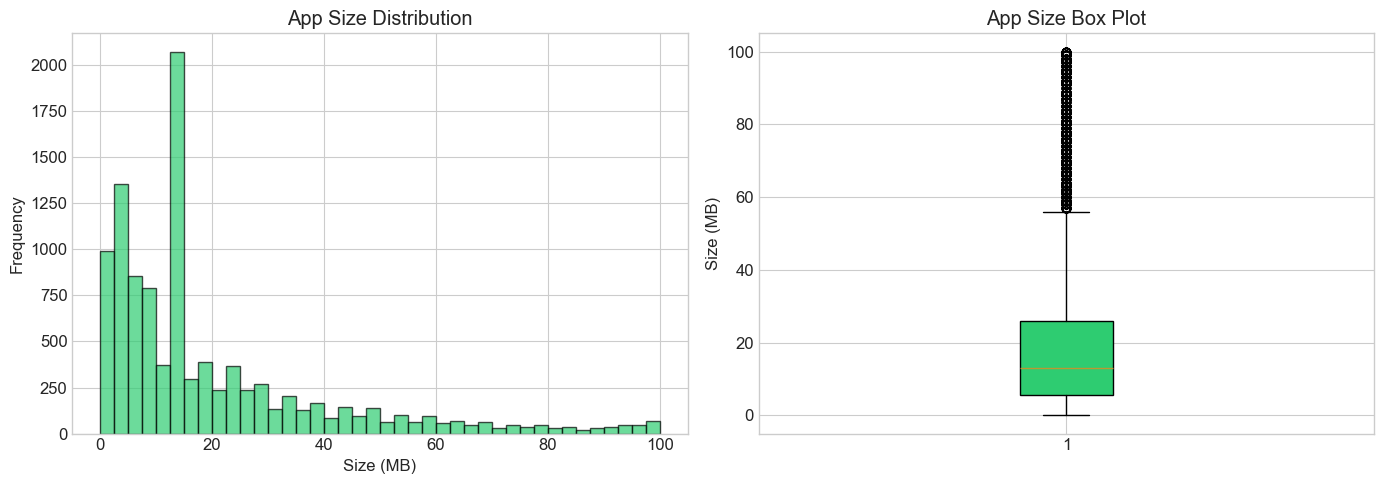


📊 Size Statistics:
   • Mean: 20.07 MB
   • Median: 13.00 MB
   • Max: 100.00 MB
   • Apps < 10 MB: 3,852 (37.2%)


In [10]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df['Size_MB'], bins=40, edgecolor='black', alpha=0.7, color='#2ecc71')
axes[0].set_xlabel('Size (MB)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('App Size Distribution')

# Box plot
bp = axes[1].boxplot(df['Size_MB'], patch_artist=True)
bp['boxes'][0].set_facecolor('#2ecc71')
axes[1].set_ylabel('Size (MB)')
axes[1].set_title('App Size Box Plot')

plt.tight_layout()
plt.show()

print(f"\n📊 Size Statistics:")
print(f"   • Mean: {df['Size_MB'].mean():.2f} MB")
print(f"   • Median: {df['Size_MB'].median():.2f} MB")
print(f"   • Max: {df['Size_MB'].max():.2f} MB")
print(f"   • Apps < 10 MB: {(df['Size_MB'] < 10).sum():,} ({(df['Size_MB'] < 10).sum()/len(df)*100:.1f}%)")

### 3.4 Installs Distribution

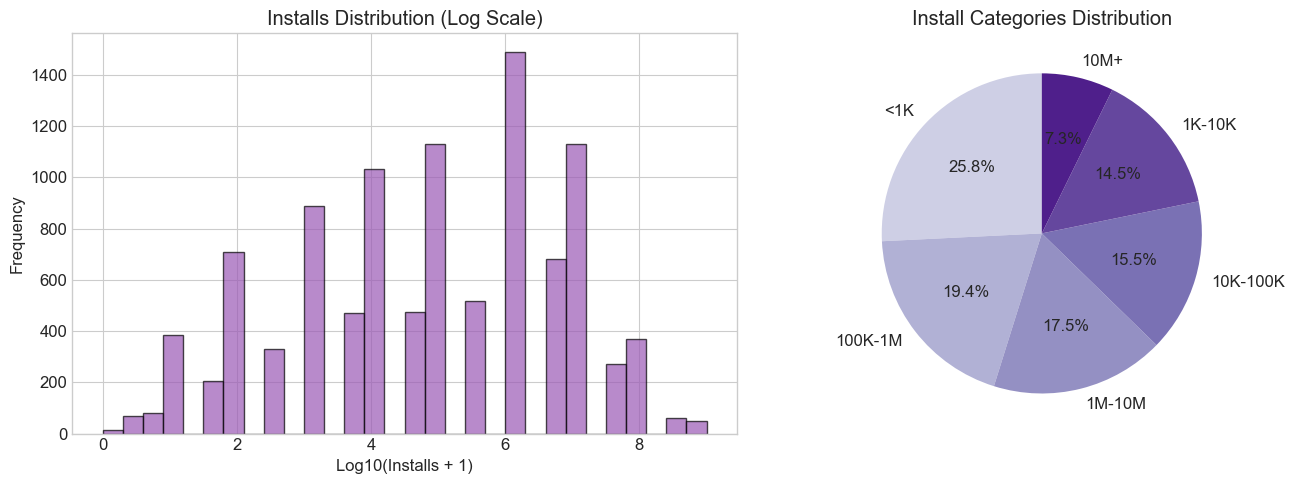


📊 Installs Statistics:
   • Mean: 14,157,759
   • Median: 100,000
   • Max: 1,000,000,000


In [11]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Log scale histogram
axes[0].hist(np.log10(df['Installs'] + 1), bins=30, edgecolor='black', alpha=0.7, color='#9b59b6')
axes[0].set_xlabel('Log10(Installs + 1)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Installs Distribution (Log Scale)')

# Install categories pie chart
install_bins = [0, 1000, 10000, 100000, 1000000, 10000000, float('inf')]
install_labels = ['<1K', '1K-10K', '10K-100K', '100K-1M', '1M-10M', '10M+']
df['Install_Category'] = pd.cut(df['Installs'], bins=install_bins, labels=install_labels)

install_counts = df['Install_Category'].value_counts()
colors = plt.cm.Purples(np.linspace(0.3, 0.9, len(install_counts)))
axes[1].pie(install_counts, labels=install_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
axes[1].set_title('Install Categories Distribution')

plt.tight_layout()
plt.show()

print(f"\n📊 Installs Statistics:")
print(f"   • Mean: {df['Installs'].mean():,.0f}")
print(f"   • Median: {df['Installs'].median():,.0f}")
print(f"   • Max: {df['Installs'].max():,.0f}")

### 3.5 Price Distribution

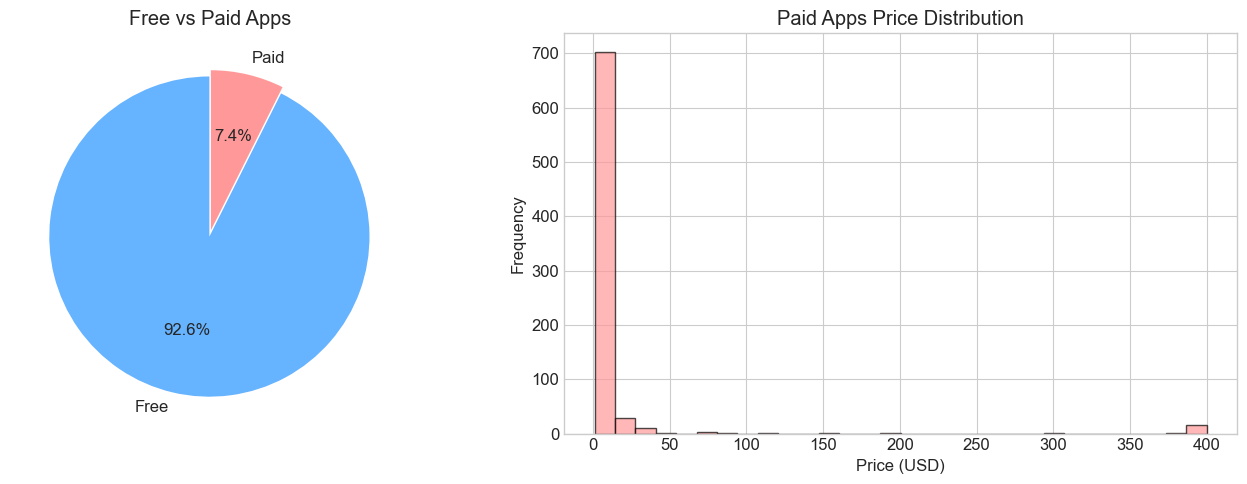


💰 Price Statistics:
   • Free Apps: 9,592 (92.6%)
   • Paid Apps: 765 (7.4%)
   • Paid apps mean price: $13.96
   • Paid apps median price: $2.99
   • Most expensive app: $400.00


In [12]:
# Free vs Paid analysis
free_apps = (df['Price_USD'] == 0).sum()
paid_apps = (df['Price_USD'] > 0).sum()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Free vs Paid pie chart
axes[0].pie([free_apps, paid_apps], labels=['Free', 'Paid'], autopct='%1.1f%%',
            colors=['#66b3ff', '#ff9999'], explode=(0.02, 0.02), startangle=90)
axes[0].set_title('Free vs Paid Apps')

# Paid apps price distribution
paid_df = df[df['Price_USD'] > 0]
axes[1].hist(paid_df['Price_USD'], bins=30, edgecolor='black', alpha=0.7, color='#ff9999')
axes[1].set_xlabel('Price (USD)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Paid Apps Price Distribution')

plt.tight_layout()
plt.show()

print(f"\n💰 Price Statistics:")
print(f"   • Free Apps: {free_apps:,} ({free_apps/len(df)*100:.1f}%)")
print(f"   • Paid Apps: {paid_apps:,} ({paid_apps/len(df)*100:.1f}%)")
print(f"   • Paid apps mean price: ${paid_df['Price_USD'].mean():.2f}")
print(f"   • Paid apps median price: ${paid_df['Price_USD'].median():.2f}")
print(f"   • Most expensive app: ${paid_df['Price_USD'].max():.2f}")

### 3.6 Type & Content Rating Distribution

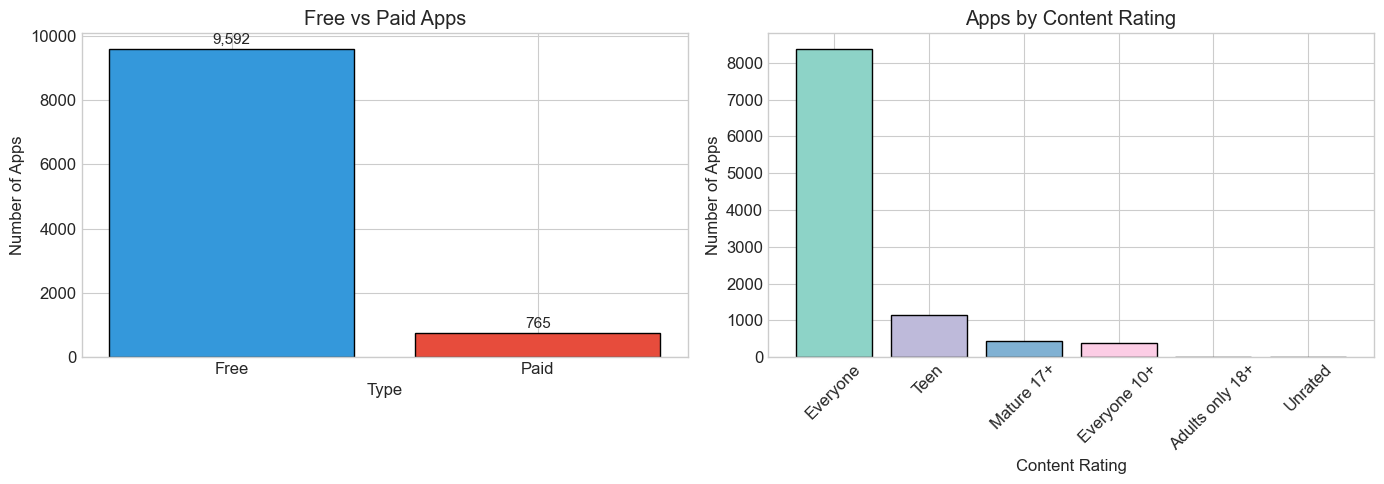

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Type distribution
type_counts = df['Type'].value_counts()
colors_type = ['#3498db', '#e74c3c']
bars1 = axes[0].bar(type_counts.index, type_counts.values, color=colors_type, edgecolor='black')
axes[0].set_xlabel('Type')
axes[0].set_ylabel('Number of Apps')
axes[0].set_title('Free vs Paid Apps')
for bar, count in zip(bars1, type_counts.values):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50, f'{count:,}',
                 ha='center', va='bottom', fontsize=11)

# Content Rating distribution
content_counts = df['Content_Rating'].value_counts()
colors_content = plt.cm.Set3(np.linspace(0, 1, len(content_counts)))
bars2 = axes[1].bar(content_counts.index, content_counts.values, color=colors_content, edgecolor='black')
axes[1].set_xlabel('Content Rating')
axes[1].set_ylabel('Number of Apps')
axes[1].set_title('Apps by Content Rating')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 4. Bivariate Analysis

Analyzing relationships between pairs of features.

### 4.1 Rating vs Type (Free/Paid)

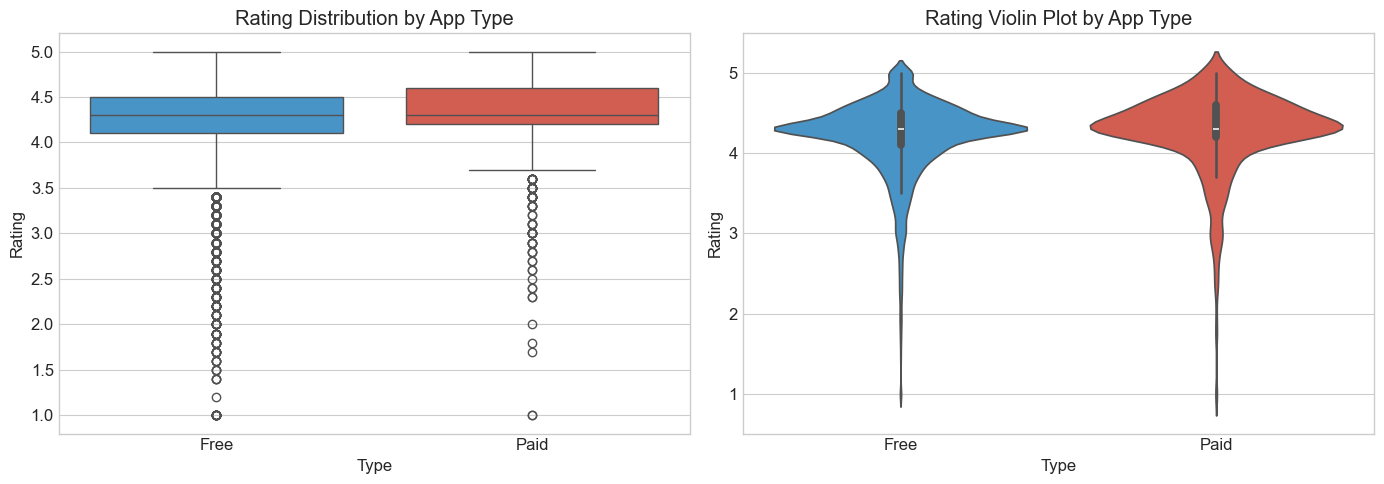

📊 Rating Statistics by Type:
      mean  median   std
Type                    
Free  4.20     4.3  0.48
Paid  4.27     4.3  0.50


In [14]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot
sns.boxplot(x='Type', y='Rating', data=df, ax=axes[0], palette=['#3498db', '#e74c3c'])
axes[0].set_title('Rating Distribution by App Type')

# Violin plot
sns.violinplot(x='Type', y='Rating', data=df, ax=axes[1], palette=['#3498db', '#e74c3c'])
axes[1].set_title('Rating Violin Plot by App Type')

plt.tight_layout()
plt.show()

# Statistics
print("📊 Rating Statistics by Type:")
print(df.groupby('Type')['Rating'].agg(['mean', 'median', 'std']).round(2))

### 4.2 Rating vs Size

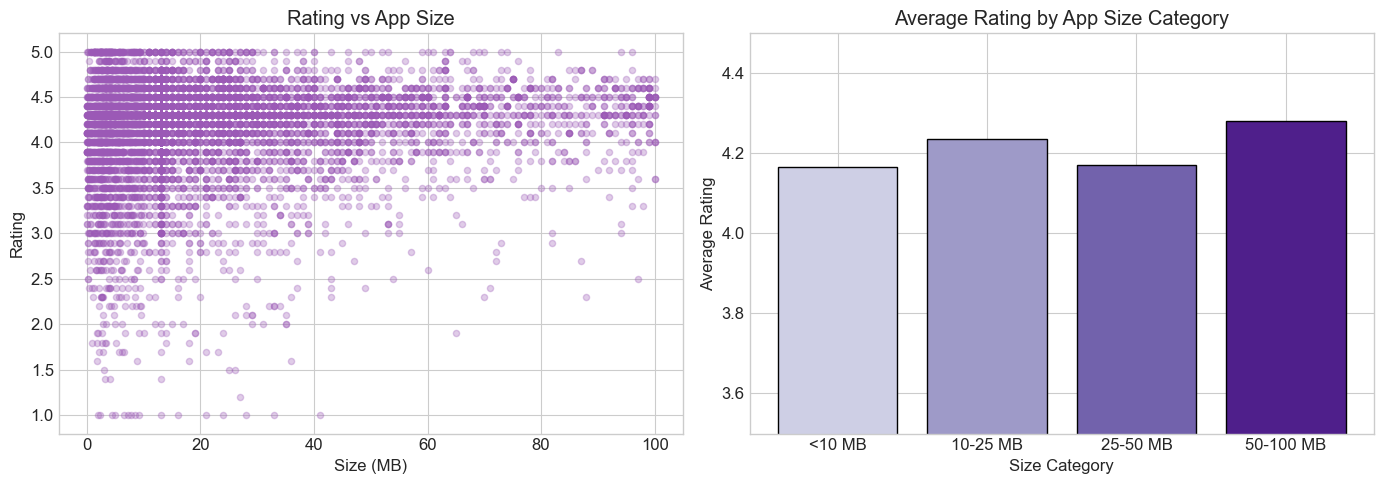

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot
axes[0].scatter(df['Size_MB'], df['Rating'], alpha=0.3, c='#9b59b6', s=20)
axes[0].set_xlabel('Size (MB)')
axes[0].set_ylabel('Rating')
axes[0].set_title('Rating vs App Size')

# Create size bins and show average rating
size_bins = [0, 10, 25, 50, 100, float('inf')]
size_labels = ['<10 MB', '10-25 MB', '25-50 MB', '50-100 MB', '>100 MB']
df['Size_Category'] = pd.cut(df['Size_MB'], bins=size_bins, labels=size_labels)

avg_rating_by_size = df.groupby('Size_Category', observed=True)['Rating'].mean()
colors = plt.cm.Purples(np.linspace(0.3, 0.9, len(avg_rating_by_size)))
bars = axes[1].bar(avg_rating_by_size.index, avg_rating_by_size.values, color=colors, edgecolor='black')
axes[1].set_xlabel('Size Category')
axes[1].set_ylabel('Average Rating')
axes[1].set_title('Average Rating by App Size Category')
axes[1].set_ylim(3.5, 4.5)

plt.tight_layout()
plt.show()

### 4.3 Reviews vs Installs

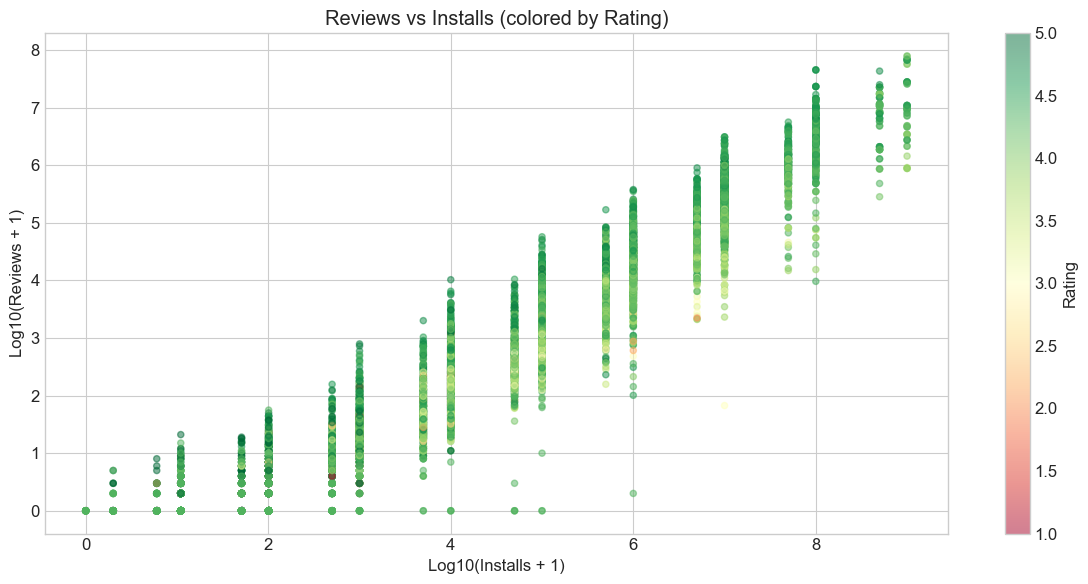


📊 Correlation between Reviews and Installs: 0.6350


In [16]:
fig, ax = plt.subplots(figsize=(12, 6))

# Use log scale for better visualization
scatter = ax.scatter(np.log10(df['Installs'] + 1), np.log10(df['Reviews'] + 1),
                     c=df['Rating'], cmap='RdYlGn', alpha=0.5, s=20)
ax.set_xlabel('Log10(Installs + 1)')
ax.set_ylabel('Log10(Reviews + 1)')
ax.set_title('Reviews vs Installs (colored by Rating)')

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Rating')

plt.tight_layout()
plt.show()

# Correlation
corr = df['Reviews'].corr(df['Installs'])
print(f"\n📊 Correlation between Reviews and Installs: {corr:.4f}")

### 4.4 Rating vs Content Rating

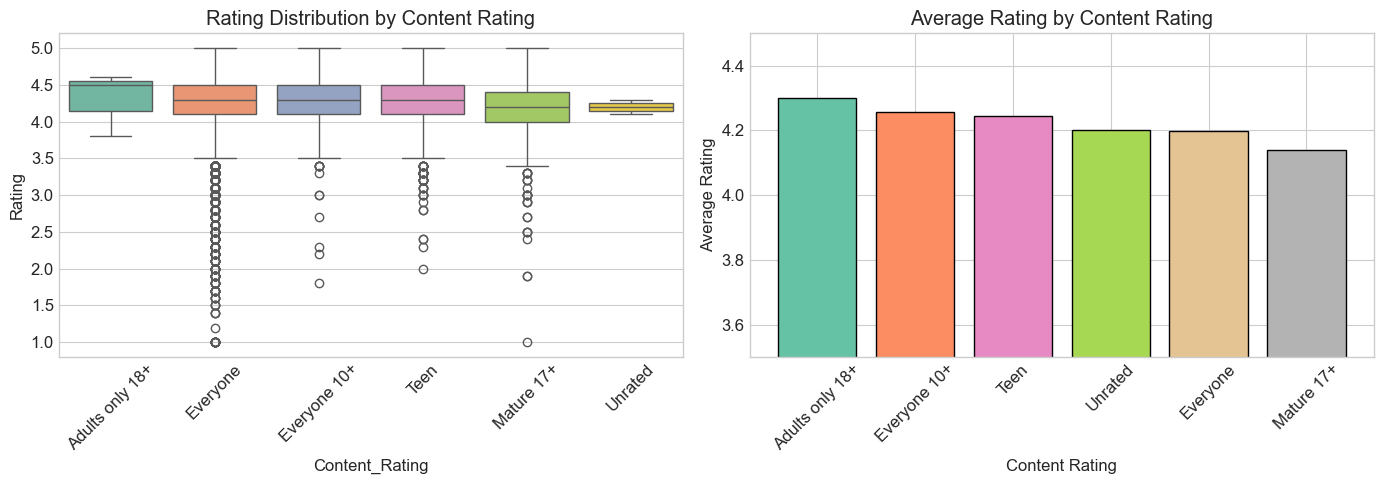

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot
order = df.groupby('Content_Rating')['Rating'].median().sort_values(ascending=False).index
sns.boxplot(x='Content_Rating', y='Rating', data=df, ax=axes[0], order=order, palette='Set2')
axes[0].set_title('Rating Distribution by Content Rating')
axes[0].tick_params(axis='x', rotation=45)

# Average rating bar chart
avg_rating = df.groupby('Content_Rating')['Rating'].mean().sort_values(ascending=False)
colors = plt.cm.Set2(np.linspace(0, 1, len(avg_rating)))
axes[1].bar(avg_rating.index, avg_rating.values, color=colors, edgecolor='black')
axes[1].set_xlabel('Content Rating')
axes[1].set_ylabel('Average Rating')
axes[1].set_title('Average Rating by Content Rating')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylim(3.5, 4.5)

plt.tight_layout()
plt.show()

## 5. Category Analysis

### 5.1 Apps by Category

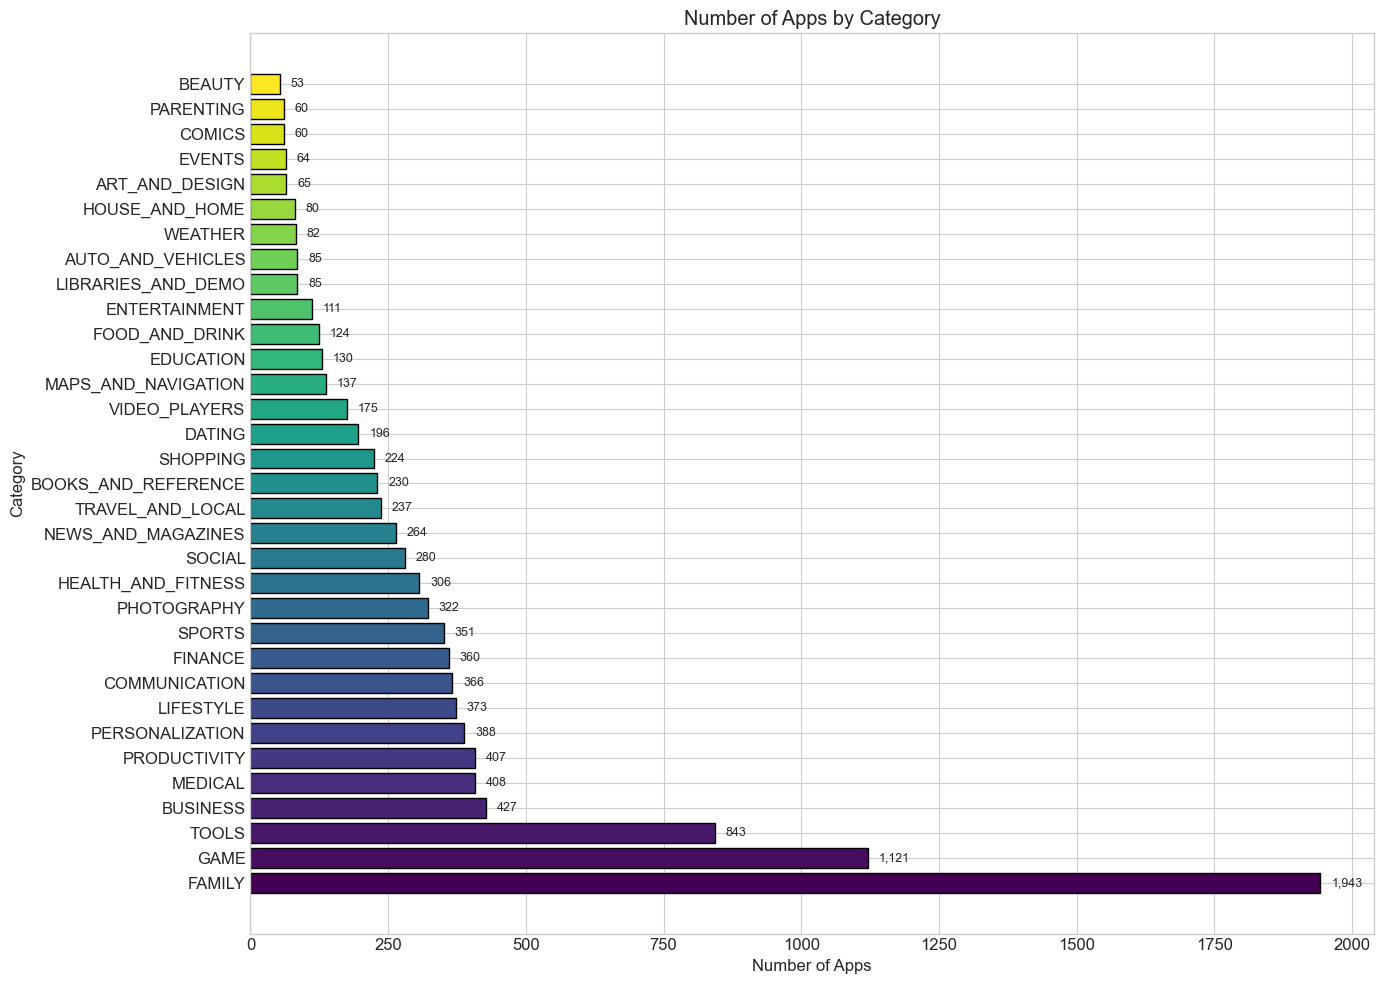


📊 Total Categories: 33
Most Popular Category: FAMILY (1,943 apps)


In [18]:
# Category distribution
category_counts = df['Category'].value_counts()

plt.figure(figsize=(14, 10))
colors = plt.cm.viridis(np.linspace(0, 1, len(category_counts)))
bars = plt.barh(category_counts.index, category_counts.values, color=colors, edgecolor='black')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.title('Number of Apps by Category')

# Add value labels
for bar, count in zip(bars, category_counts.values):
    plt.text(count + 20, bar.get_y() + bar.get_height()/2, f'{count:,}',
             va='center', fontsize=9)

plt.tight_layout()
plt.show()

print(f"\n📊 Total Categories: {df['Category'].nunique()}")
print(f"Most Popular Category: {category_counts.index[0]} ({category_counts.values[0]:,} apps)")

### 5.2 Average Rating by Category

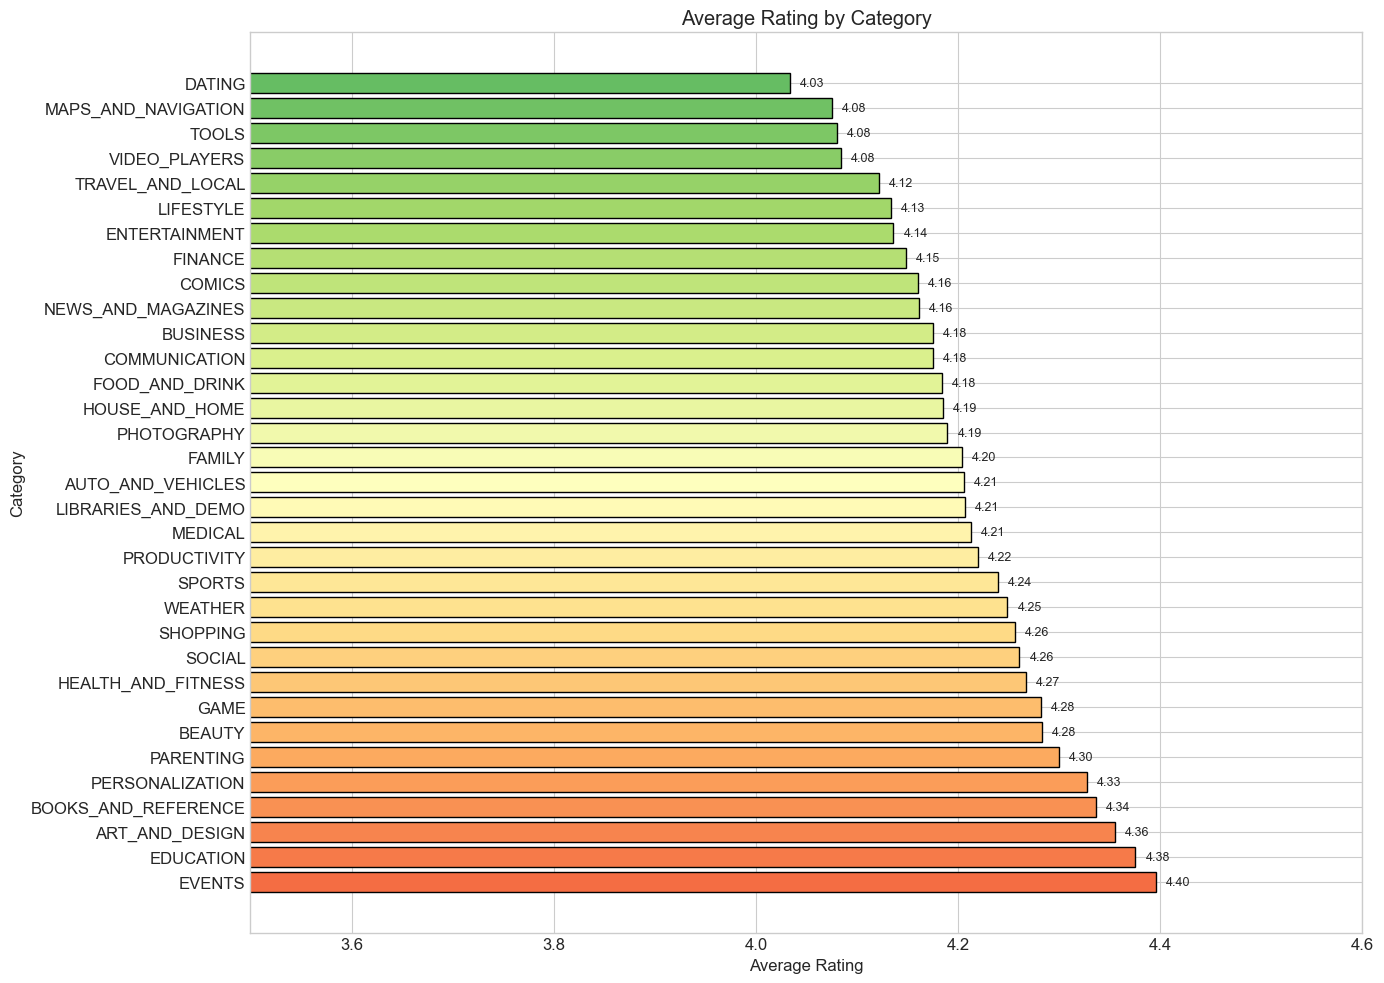

In [19]:
# Average rating by category
avg_rating_cat = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 10))
colors = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(avg_rating_cat)))
bars = plt.barh(avg_rating_cat.index, avg_rating_cat.values, color=colors, edgecolor='black')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.title('Average Rating by Category')
plt.xlim(3.5, 4.6)

# Add value labels
for bar, rating in zip(bars, avg_rating_cat.values):
    plt.text(rating + 0.01, bar.get_y() + bar.get_height()/2, f'{rating:.2f}',
             va='center', fontsize=9)

plt.tight_layout()
plt.show()

### 5.3 Total Installs by Category

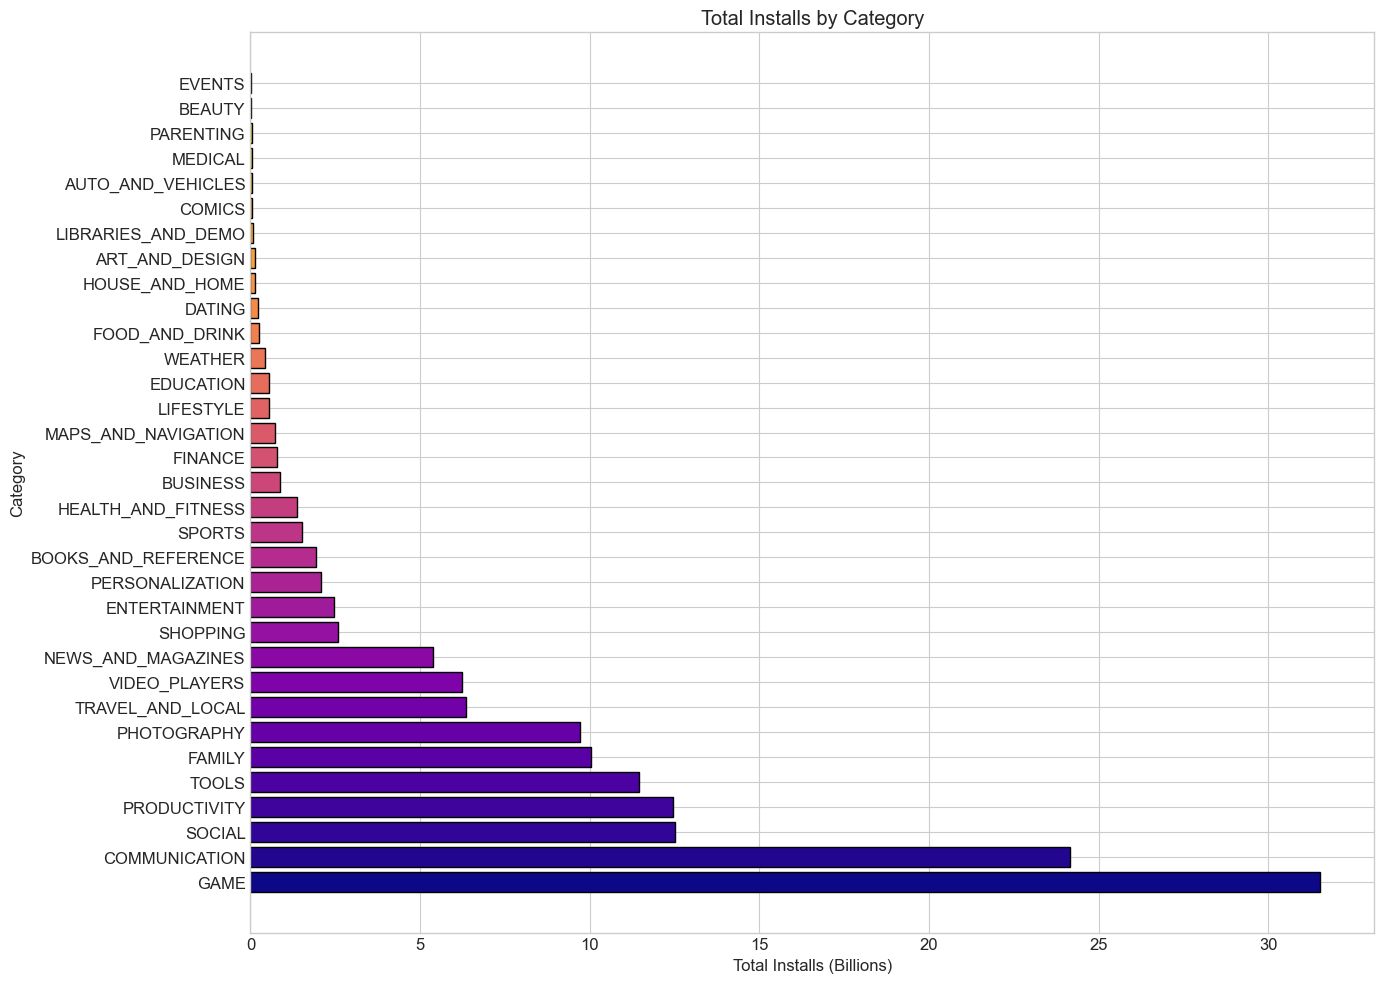


🏆 Top 5 Categories by Total Installs:
   1. GAME: 31.54B installs
   2. COMMUNICATION: 24.15B installs
   3. SOCIAL: 12.51B installs
   4. PRODUCTIVITY: 12.46B installs
   5. TOOLS: 11.45B installs


In [20]:
# Total installs by category
total_installs = df.groupby('Category')['Installs'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 10))
colors = plt.cm.plasma(np.linspace(0, 1, len(total_installs)))
bars = plt.barh(total_installs.index, total_installs.values / 1e9, color=colors, edgecolor='black')
plt.xlabel('Total Installs (Billions)')
plt.ylabel('Category')
plt.title('Total Installs by Category')

plt.tight_layout()
plt.show()

print(f"\n🏆 Top 5 Categories by Total Installs:")
for i, (cat, installs) in enumerate(total_installs.head().items(), 1):
    print(f"   {i}. {cat}: {installs/1e9:.2f}B installs")

### 5.4 Free vs Paid Apps by Category

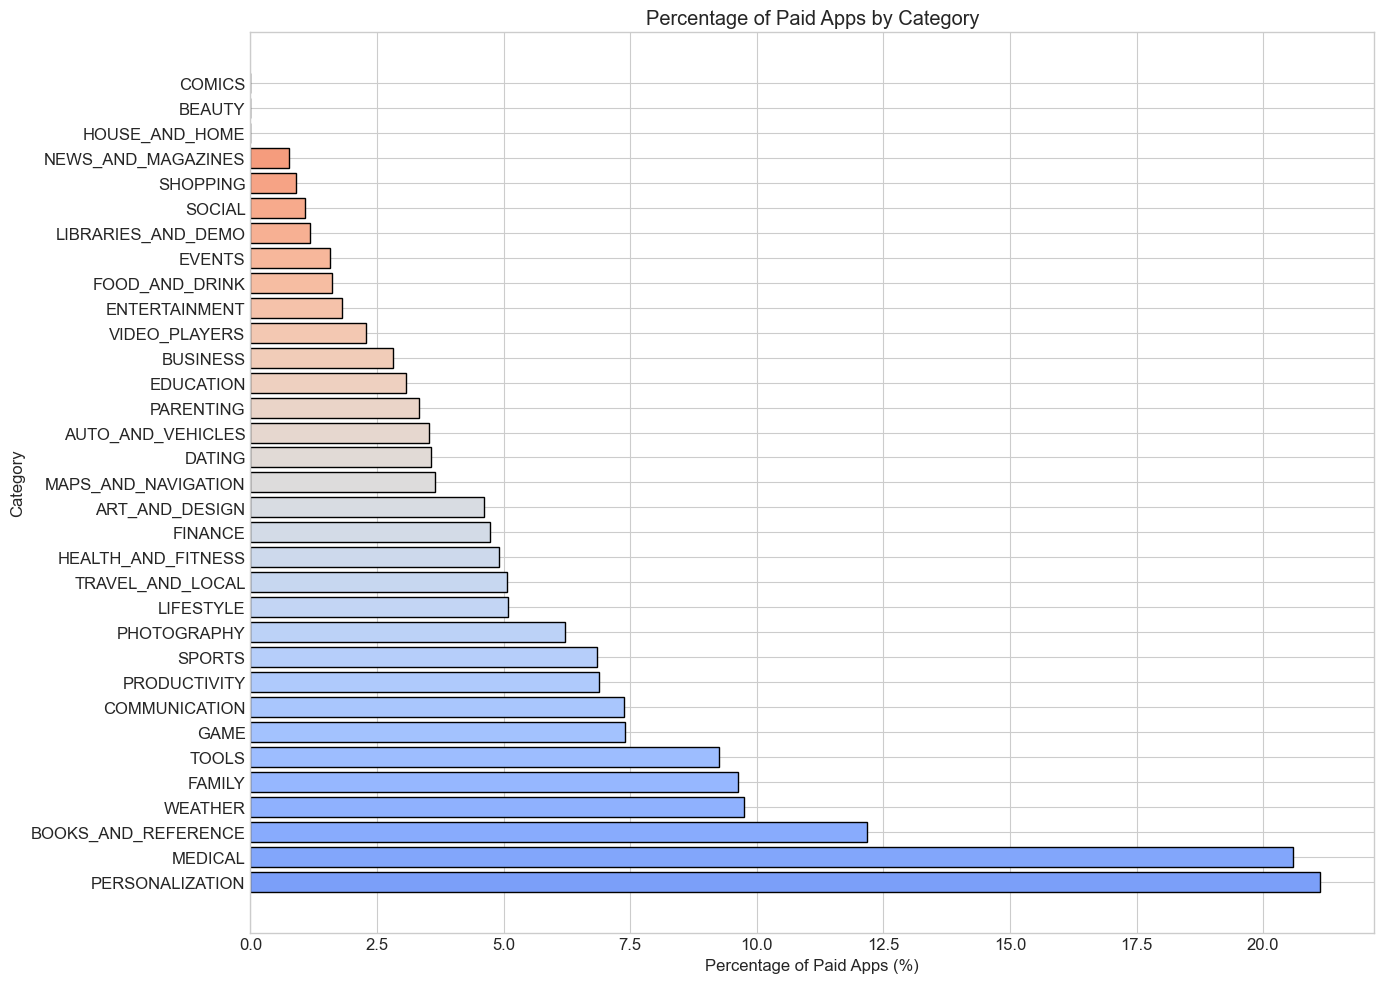

In [21]:
# Free vs Paid by category
category_type = df.groupby(['Category', 'Type']).size().unstack(fill_value=0)

# Calculate percentage of paid apps
if 'Paid' in category_type.columns:
    category_type['Paid_Pct'] = category_type['Paid'] / (category_type['Free'] + category_type['Paid']) * 100
    category_type_sorted = category_type.sort_values('Paid_Pct', ascending=False)

    plt.figure(figsize=(14, 10))
    colors = plt.cm.coolwarm(np.linspace(0.2, 0.8, len(category_type_sorted)))
    bars = plt.barh(category_type_sorted.index, category_type_sorted['Paid_Pct'], color=colors, edgecolor='black')
    plt.xlabel('Percentage of Paid Apps (%)')
    plt.ylabel('Category')
    plt.title('Percentage of Paid Apps by Category')

    plt.tight_layout()
    plt.show()

### 5.5 Top 10 Apps Analysis

🏆 Top 10 Most Installed Apps:


,App,Category,Rating,Reviews,Installs,Type
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,1000000000,Free
302,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,1000000000,Free
303,WhatsApp Messenger,COMMUNICATION,4.4,69119316,1000000000,Free
305,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,1000000000,Free
307,Gmail,COMMUNICATION,4.3,4604324,1000000000,Free
308,Hangouts,COMMUNICATION,4.0,3419249,1000000000,Free
348,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,1000000000,Free
352,Hangouts,COMMUNICATION,4.0,3419433,1000000000,Free
357,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,1000000000,Free
375,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9643041,1000000000,Free


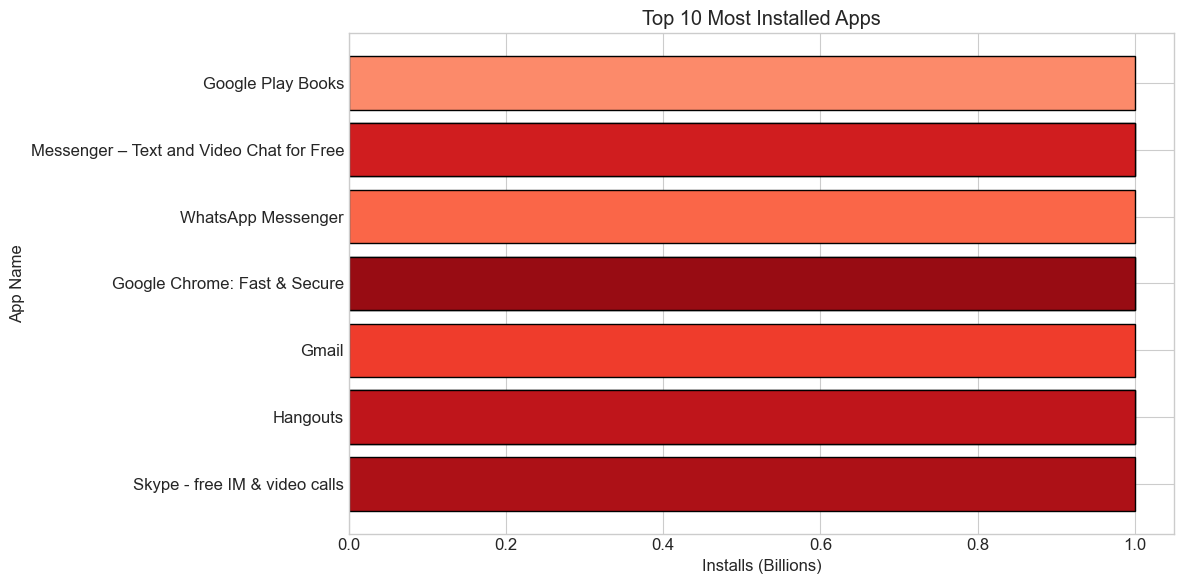

In [22]:
# Top 10 most installed apps
top_10 = df.nlargest(10, 'Installs')[['App', 'Category', 'Rating', 'Reviews', 'Installs', 'Type']]

print("🏆 Top 10 Most Installed Apps:")
print("="*80)
display(top_10)

# Visualize
plt.figure(figsize=(12, 6))
colors = plt.cm.Reds(np.linspace(0.4, 0.9, 10))
bars = plt.barh(top_10['App'], top_10['Installs'] / 1e9, color=colors, edgecolor='black')
plt.xlabel('Installs (Billions)')
plt.ylabel('App Name')
plt.title('Top 10 Most Installed Apps')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 6. Correlation Analysis

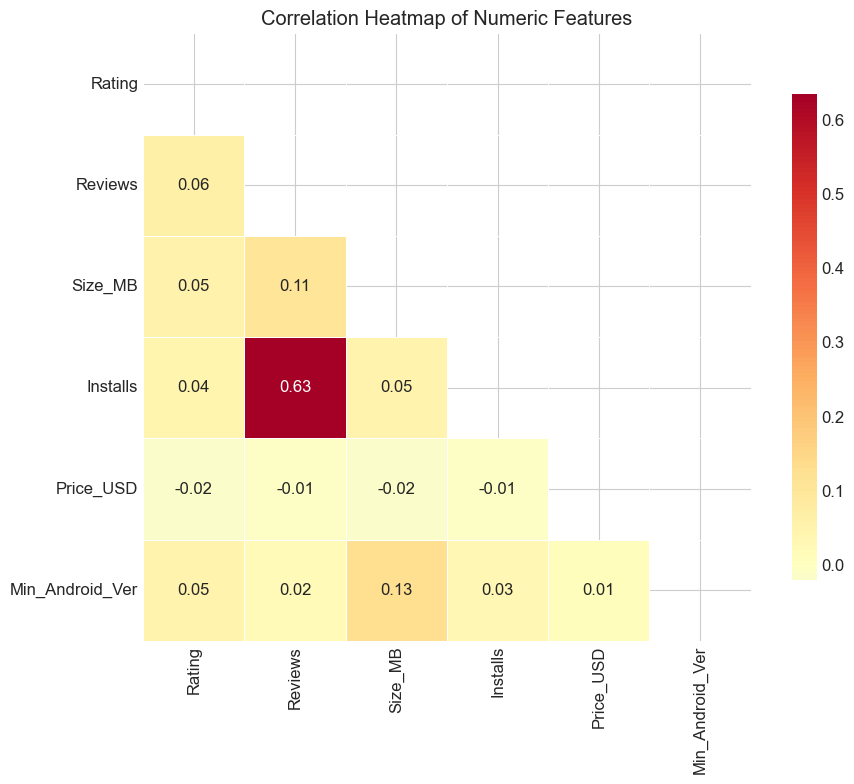


📊 Key Correlations:
   • Reviews ↔ Installs: 0.635 (Strong positive)
   • Rating ↔ Reviews: 0.063
   • Rating ↔ Size: 0.053


In [23]:
# Select numeric columns
numeric_cols = ['Rating', 'Reviews', 'Size_MB', 'Installs', 'Price_USD', 'Min_Android_Ver']
correlation_matrix = df[numeric_cols].corr()

# Create heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu_r', center=0,
            fmt='.2f', linewidths=0.5, square=True, mask=mask,
            cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

print("\n📊 Key Correlations:")
print(f"   • Reviews ↔ Installs: {correlation_matrix.loc['Reviews', 'Installs']:.3f} (Strong positive)")
print(f"   • Rating ↔ Reviews: {correlation_matrix.loc['Rating', 'Reviews']:.3f}")
print(f"   • Rating ↔ Size: {correlation_matrix.loc['Rating', 'Size_MB']:.3f}")

### 6.1 Pair Plot for Key Features

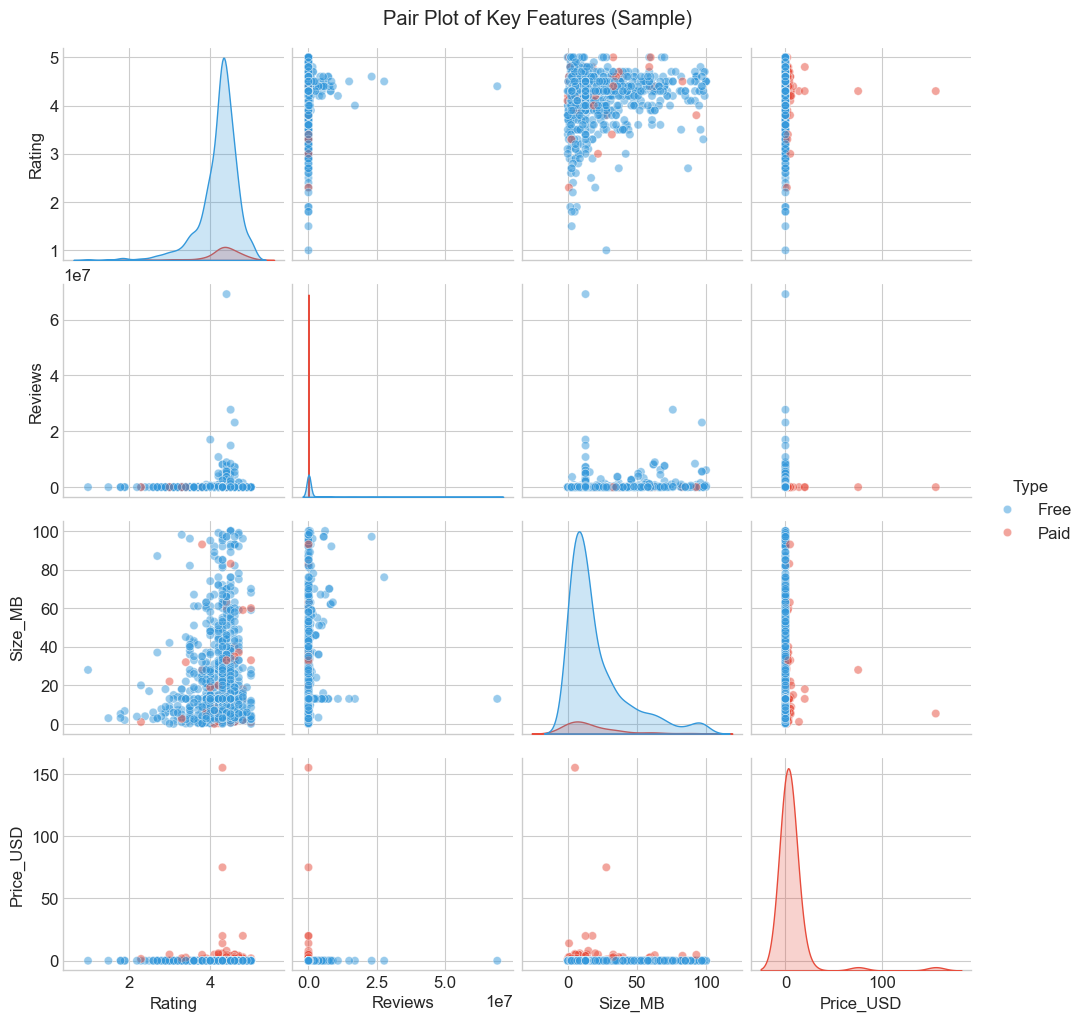

In [24]:
# Sample data for pair plot (full data takes too long)
sample_df = df.sample(min(1000, len(df)), random_state=42)

# Create pair plot
g = sns.pairplot(sample_df[['Rating', 'Reviews', 'Size_MB', 'Price_USD', 'Type']],
                 hue='Type', palette=['#3498db', '#e74c3c'], diag_kind='kde',
                 plot_kws={'alpha': 0.5}, height=2.5)
g.fig.suptitle('Pair Plot of Key Features (Sample)', y=1.02)
plt.show()

## 7. Time-Based Analysis

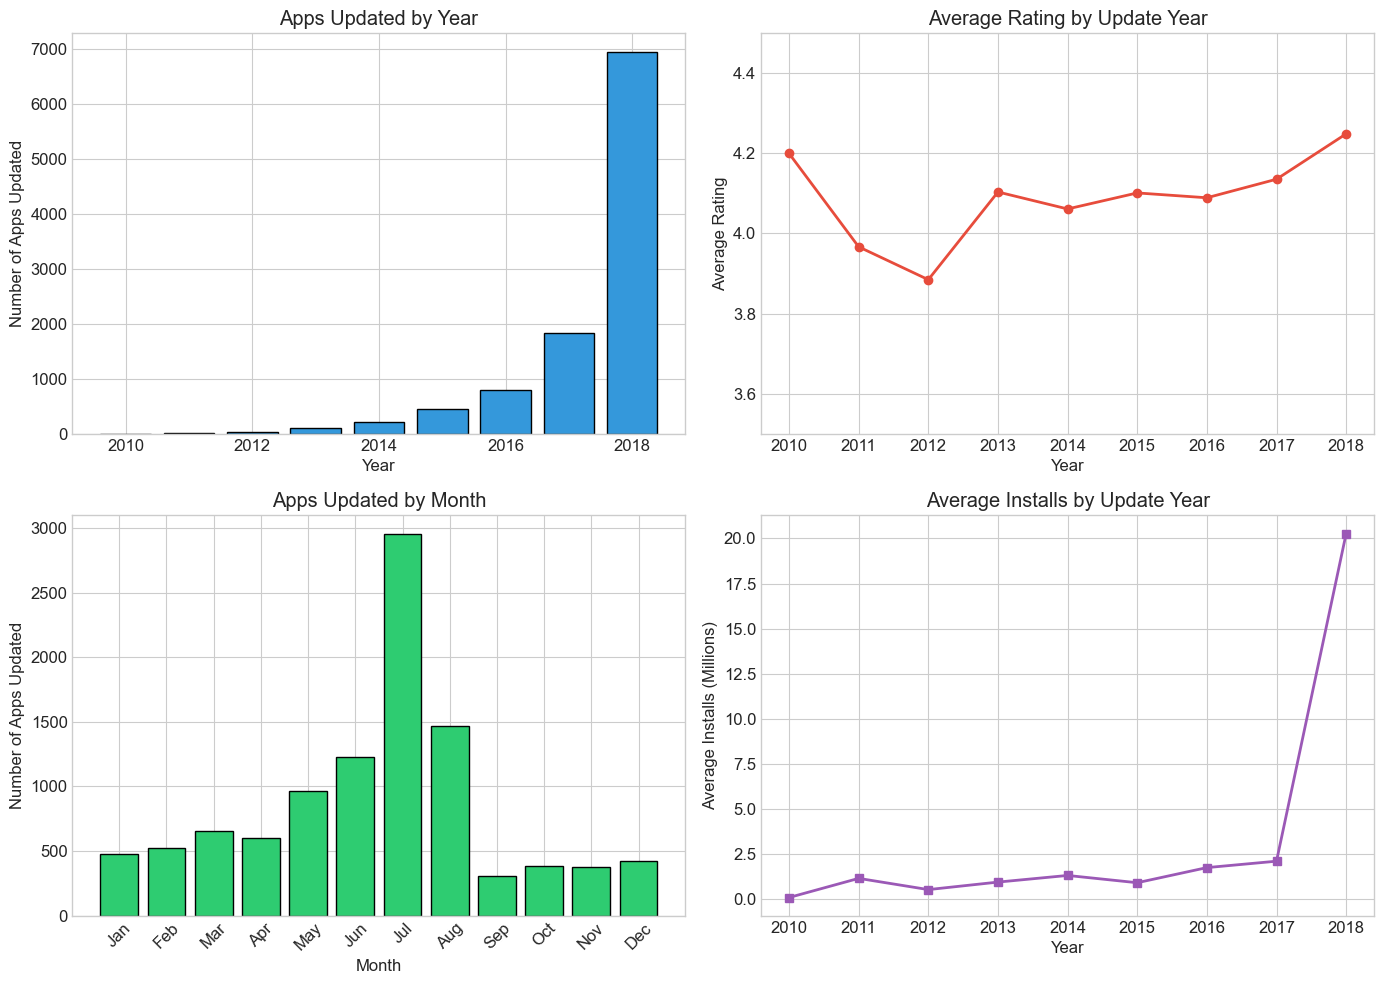

In [25]:
# Extract year and month
df['Update_Year'] = df['Last_Updated'].dt.year
df['Update_Month'] = df['Last_Updated'].dt.month

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Apps updated by year
yearly_counts = df['Update_Year'].value_counts().sort_index()
axes[0, 0].bar(yearly_counts.index, yearly_counts.values, color='#3498db', edgecolor='black')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Number of Apps Updated')
axes[0, 0].set_title('Apps Updated by Year')

# Average rating by year
yearly_rating = df.groupby('Update_Year')['Rating'].mean()
axes[0, 1].plot(yearly_rating.index, yearly_rating.values, marker='o', linewidth=2, color='#e74c3c')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Average Rating')
axes[0, 1].set_title('Average Rating by Update Year')
axes[0, 1].set_ylim(3.5, 4.5)

# Apps updated by month
monthly_counts = df['Update_Month'].value_counts().sort_index()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
axes[1, 0].bar(range(1, 13), [monthly_counts.get(i, 0) for i in range(1, 13)],
               color='#2ecc71', edgecolor='black')
axes[1, 0].set_xticks(range(1, 13))
axes[1, 0].set_xticklabels(month_names, rotation=45)
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Number of Apps Updated')
axes[1, 0].set_title('Apps Updated by Month')

# Average installs by year
yearly_installs = df.groupby('Update_Year')['Installs'].mean()
axes[1, 1].plot(yearly_installs.index, yearly_installs.values / 1e6, marker='s', linewidth=2, color='#9b59b6')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Average Installs (Millions)')
axes[1, 1].set_title('Average Installs by Update Year')

plt.tight_layout()
plt.show()

## 8. Key Insights & Conclusions

In [26]:
print("="*80)
print("                    📊 KEY INSIGHTS FROM EDA                    ")
print("="*80)

print("\n1️⃣ DATASET OVERVIEW:")
print(f"   • Total Apps Analyzed: {len(df):,}")
print(f"   • Total Categories: {df['Category'].nunique()}")
print(f"   • Date Range: {df['Last_Updated'].min().strftime('%Y-%m-%d')} to {df['Last_Updated'].max().strftime('%Y-%m-%d')}")

print("\n2️⃣ RATING INSIGHTS:")
print(f"   • Average Rating: {df['Rating'].mean():.2f}")
print(f"   • Most apps rated between 4.0 - 4.5")
print(f"   • Paid apps have slightly higher average rating than free apps")

print("\n3️⃣ PRICING INSIGHTS:")
free_pct = (df['Price_USD'] == 0).sum() / len(df) * 100
print(f"   • {free_pct:.1f}% of apps are FREE")
paid_df = df[df['Price_USD'] > 0]
print(f"   • Average paid app price: ${paid_df['Price_USD'].mean():.2f}")
print(f"   • Most expensive app: ${df['Price_USD'].max():.2f}")

print("\n4️⃣ CATEGORY INSIGHTS:")
top_cat = df['Category'].value_counts().head(3)
print(f"   • Top 3 Categories by App Count:")
for i, (cat, count) in enumerate(top_cat.items(), 1):
    print(f"      {i}. {cat}: {count:,} apps")

print("\n5️⃣ INSTALL INSIGHTS:")
print(f"   • Total Installs: {df['Installs'].sum():,.0f}")
print(f"   • Average Installs per App: {df['Installs'].mean():,.0f}")
print(f"   • Top Category by Installs: {df.groupby('Category')['Installs'].sum().idxmax()}")

print("\n6️⃣ CORRELATION INSIGHTS:")
print(f"   • Strong positive correlation between Reviews and Installs")
print(f"   • Weak correlation between Rating and other numeric features")
print(f"   • Price has minimal impact on rating")

print("\n" + "="*80)
print("                    ✅ EDA COMPLETED SUCCESSFULLY                    ")
print("="*80)

                    📊 KEY INSIGHTS FROM EDA                    

1️⃣ DATASET OVERVIEW:
   • Total Apps Analyzed: 10,357
   • Total Categories: 33
   • Date Range: 2010-05-21 to 2018-08-08

2️⃣ RATING INSIGHTS:
   • Average Rating: 4.20
   • Most apps rated between 4.0 - 4.5
   • Paid apps have slightly higher average rating than free apps

3️⃣ PRICING INSIGHTS:
   • 92.6% of apps are FREE
   • Average paid app price: $13.96
   • Most expensive app: $400.00

4️⃣ CATEGORY INSIGHTS:
   • Top 3 Categories by App Count:
      1. FAMILY: 1,943 apps
      2. GAME: 1,121 apps
      3. TOOLS: 843 apps

5️⃣ INSTALL INSIGHTS:
   • Total Installs: 146,631,914,527
   • Average Installs per App: 14,157,759
   • Top Category by Installs: GAME

6️⃣ CORRELATION INSIGHTS:
   • Strong positive correlation between Reviews and Installs
   • Weak correlation between Rating and other numeric features
   • Price has minimal impact on rating

                    ✅ EDA COMPLETED SUCCESSFULLY                    